In [ ]:
import kaggle
#!kaggle datasets download rabieelkharoua/students-performance-dataset -f Student_performance_data_.csv
import os
import zipfile
from pathlib import Path

# Define paths
data_dir = Path('./datasets')
zip_file_path = data_dir / 'students-performance-dataset.zip'

# Create directory if it doesn't exist
data_dir.mkdir(parents=True, exist_ok=True)

# Define the dataset and download it
dataset_name = 'rabieelkharoua/students-performance-dataset'
!kaggle datasets download -d {dataset_name} -p {data_dir}

# Unzip the downloaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

# List the extracted files
extracted_files = [f for f in data_dir.iterdir() if f.is_file()]
print("Extracted Files:")
for file in extracted_files:
   print(file)
    


In [4]:
import pandas as pd

#reading csv file
df = pd.read_csv('Student_performance_data _.csv')

#displaying the few rows
print(df.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [5]:
#basic info about the DataFrame
print(df.info())

print(df.describe())

#check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
         StudentID 

In [6]:
sel_columns = df[['Gender', 'Ethnicity', 'GPA']]

f_students = df[df['Gender'] == '1']

In [7]:
pass_students = df[df['GPA'] > 70]

In [8]:
#dropping rows that has missing values
df_clean = df.dropna()

#removing duplicates
df_unique = df.drop_duplicates()

#replacing missing values
#df['GPA'].fillna(df['GPA'].mean(), inplace=True)



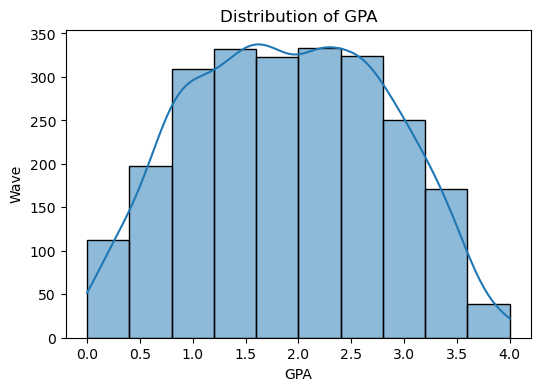

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#placing histogram
plt.figure(figsize=(6,4))
sns.histplot(df['GPA'], bins= 10, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Wave')
plt.show()

In [10]:
#save the file to csv
df.to_csv('modified_students_performance.csv', index=False)